In [3]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Load dataset
data = load_iris()

# Get features and target
X=data.data
y=data.target

In [4]:
# Get dummy variable 
y = pd.get_dummies(y).values

In [5]:
#Split data into train and test data
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [4]:
# read data from files
tra = pd.read_csv("optdigits.tra",header=None)
x_train = tra.values[:,:64]
y_training = tra.values[:,-1]

tes = pd.read_csv("optdigits.tes",header=None)
x_test = tes.values[:,:64]
y_testing = tes.values[:,-1]

y_train = pd.get_dummies(y_training).values
y_test = pd.get_dummies(y_testing).values

In [7]:
print(x_train[:10])
print(y_train[:10])

[[ 0  1  6 15 12  1  0  0  0  7 16  6  6 10  0  0  0  8 16  2  0 11  2  0
   0  5 16  3  0  5  7  0  0  7 13  3  0  8  7  0  0  4 12  0  1 13  5  0
   0  0 14  9 15  9  0  0  0  0  6 14  7  1  0  0]
 [ 0  0 10 16  6  0  0  0  0  7 16  8 16  5  0  0  0 11 16  0  6 14  3  0
   0 12 12  0  0 11 11  0  0 12 12  0  0  8 12  0  0  7 15  1  0 13 11  0
   0  0 16  8 10 15  3  0  0  0 10 16 15  3  0  0]
 [ 0  0  8 15 16 13  0  0  0  1 11  9 11 16  1  0  0  0  0  0  7 14  0  0
   0  0  3  4 14 12  2  0  0  1 16 16 16 16 10  0  0  2 12 16 10  0  0  0
   0  0  2 16  4  0  0  0  0  0  9 14  0  0  0  0]
 [ 0  0  0  3 11 16  0  0  0  0  5 16 11 13  7  0  0  3 15  8  1 15  6  0
   0 11 16 16 16 16 10  0  0  1  4  4 13 10  2  0  0  0  0  0 15  4  0  0
   0  0  0  3 16  0  0  0  0  0  0  1 15  2  0  0]
 [ 0  0  5 14  4  0  0  0  0  0 13  8  0  0  0  0  0  3 14  4  0  0  0  0
   0  6 16 14  9  2  0  0  0  4 16  3  4 11  2  0  0  0 14  3  0  4 11  0
   0  0 10  8  4 11 12  0  0  0  4 12 14  7  0  0]
 [ 0 

In [35]:
# Initialize variables
learning_rate = 0.1
iterations = 2000
N = y_train.size

# number of input features
input_size = 64

# number of hidden layers neurons
hidden_size = 20

hidden_2 = 2

# number of neurons at the output layer
output_size = 10  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [36]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=1, size=(input_size, hidden_size))   

W2 = np.random.normal(scale=1, size=(hidden_size, hidden_2)) 

# initializing weight for the output layer
W3 = np.random.normal(scale=1, size=(hidden_2 , output_size)) 

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [38]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(x_train, W1)
    A1 = sigmoid(Z1)
    # print(A1.shape)
    # second hidden layer
    ZH = np.dot(A1, W2)
    AH = sigmoid(ZH)
    # print(AH.shape)

    # on output layer
    Z3 = np.dot(AH, W3)
    A3 = sigmoid(Z3)
    # print(A2.shape)
    
    # Calculating error
    mse = mean_squared_error(A3, y_train)
    acc = accuracy(A3, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A3 - sigmoid(y_train)
    dW1 = E1 * A3 * (1 - A3)
    # print(dW1.shape)
    EH = np.dot(dW1, W3.T)
    dW2 = EH * AH * (1 - AH)
    # print(dW2.shape)
    E2 = np.dot(dW2, W2.T)
    dW3 = E2 * A1 * (1 - A1)
    # print(dW3.shape)
    
    # weight updates
    W2_update = np.dot(A1.T,dW2) / N 
    # print(W2_update.shape)
    W3_update = np.dot(AH.T, dW1) / N
    # print(W3_update.shape)
    W1_update = np.dot(x_train.T, dW3) / N
    # print(W1_update.shape)
    W3 = W3 - learning_rate * W3_update
    W1 = W1 - learning_rate * W1_update
    W2 = W2 - learning_rate * W2_update

/tmp/ipykernel_9316/1907685154.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/tmp/ipykernel_9316/2206021474.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_9316/1907685154.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/tmp/ipykernel_9316/2206021474.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_9316/1907685154.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/tmp/ipykernel_9316/2206021474.py:2: RuntimeWa

<AxesSubplot:title={'center':'Mean Squared Error'}>

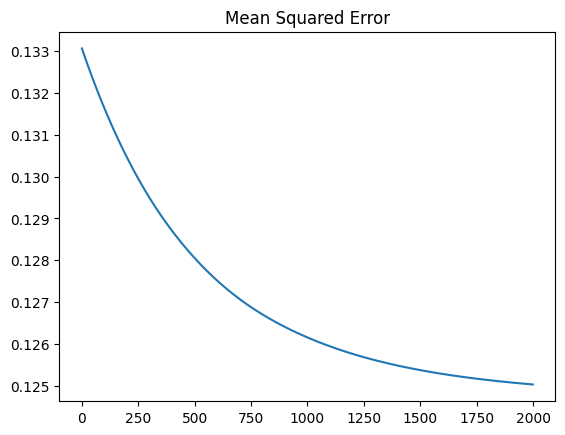

In [39]:
results.mse.plot(title="Mean Squared Error")

<AxesSubplot:title={'center':'Accuracy'}>

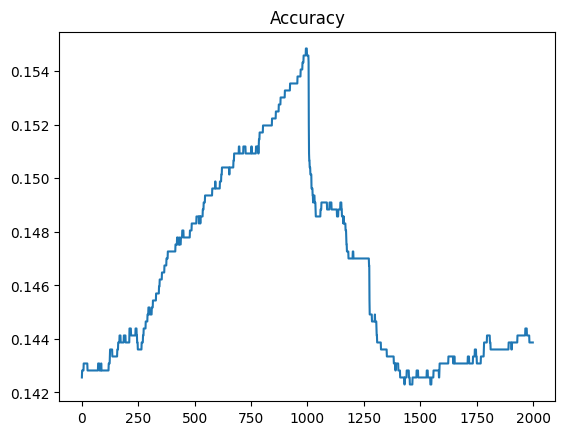

In [40]:
results.accuracy.plot(title="Accuracy")

In [31]:
# feedforward
# Z1 = np.dot(x_test, W1)
# A1 = sigmoid(Z1)


# Z3 = np.dot(A1, W3)
# A3 = sigmoid(Z3)

acc = accuracy(A3, y_train)
print("Accuracy: {}".format(acc))

Accuracy: 0.20821344493852995


[[1.00000000e+00 1.00000000e+00 3.03539317e-22 ... 1.00000000e+00
  9.99999999e-01 7.26171223e-12]
 [1.00000000e+00 1.00000000e+00 5.71740877e-11 ... 1.00000000e+00
  2.48349638e-02 1.09290584e-05]
 [1.00000000e+00 9.99992012e-01 2.67941095e-46 ... 1.00000000e+00
  7.34509073e-07 1.01175984e-19]
 ...
 [1.00000000e+00 1.00000000e+00 2.96571826e-39 ... 1.00000000e+00
  4.26907663e-01 4.75966014e-36]
 [1.00000000e+00 1.00000000e+00 2.98620614e-07 ... 1.00000000e+00
  9.99969146e-01 9.23717258e-14]
 [6.46505576e-15 1.00000000e+00 2.88062814e-25 ... 1.00000000e+00
  9.99748947e-01 7.71975868e-09]]


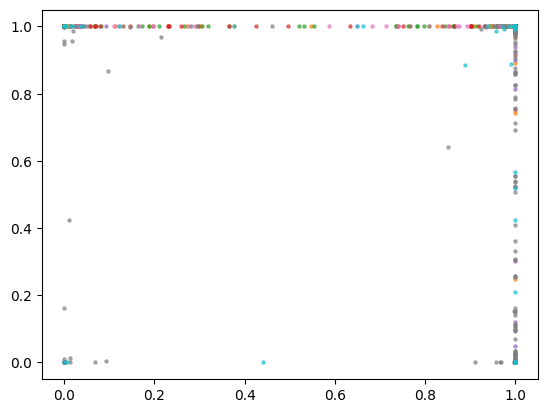

In [41]:

print(A1[:100,:])
for i in range(0,10):
    x = A1[y_training == i]
    plt.scatter(x[:, 0], x[:, 1 ],alpha=0.6,s=5)

plt.show()

In [34]:
print(y_train[:10])
print(A3[:10])

[[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]]
[[0.11332667 0.08968715 0.09573173 0.10072831 0.10588593 0.09731242
  0.14693566 0.09382084 0.07415335 0.0950856 ]
 [0.09947853 0.10075749 0.09860156 0.09994925 0.09925104 0.09763464
  0.07971507 0.10214479 0.09177247 0.10090877]
 [0.0901122  0.12098462 0.10748311 0.10437427 0.09708517 0.10333306
  0.04026458 0.11838282 0.12297667 0.11369103]
 [0.09205336 0.12950315 0.11330038 0.1092051  0.10048524 0.10841774
  0.03733348 0.12594833 0.13428091 0.12043299]
 [0.17374026 0.04561048 0.07285989 0.09095973 0.12301974 0.08341693
  0.75660056 0.05535154 0.02372328 0.06314758]
 [0.09336253 0.11321438 0.1041281  0.1026952  0.09781292 0.10117874
  0.05171206 0.11219258 0.11066489 0.10884306]
 [0.08842524 0.12554303 0.10944625 0.10538076 0.09675191 0.10460881
  0.0350643